Mean Absolute Error: 0.6892429127342113
R2 Score: 0.9958227411424339


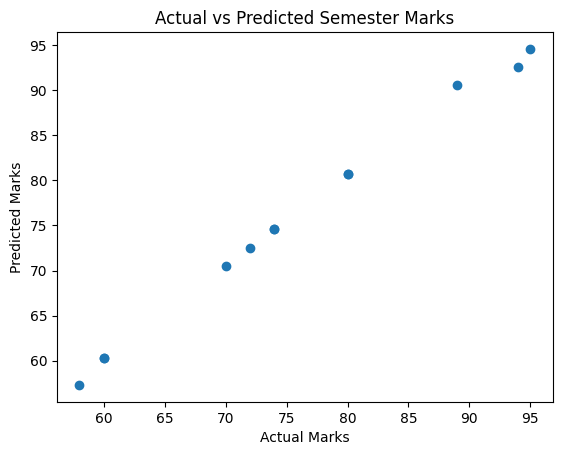

Predicted Marks: 77
Predicted Grade: B


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('ITBdata.csv')

X = df[["internal_marks", "attendance_percentage", "assignment_score"]]
y = df["semester_marks"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Semester Marks")
plt.show()

def grade(marks):
    if marks >= 90:
        return "O"
    elif marks >= 80:
        return "A"
    elif marks >= 70:
        return "B"
    elif marks >= 60:
        return "C"
    else:
        return "D"

df["predicted_marks"] = model.predict(X)
df["predicted_grade"] = df["predicted_marks"].apply(grade)

new_student = pd.DataFrame(
    [[75, 85, 80]],
    columns=["internal_marks", "attendance_percentage", "assignment_score"]
)

predicted_marks = model.predict(new_student)[0]
predicted_grade = grade(predicted_marks)

print("Predicted Marks:", int(predicted_marks))
print("Predicted Grade:", predicted_grade)
